In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

In [17]:
sample1 = np.random.normal(loc=10, scale=100, size=(2000))

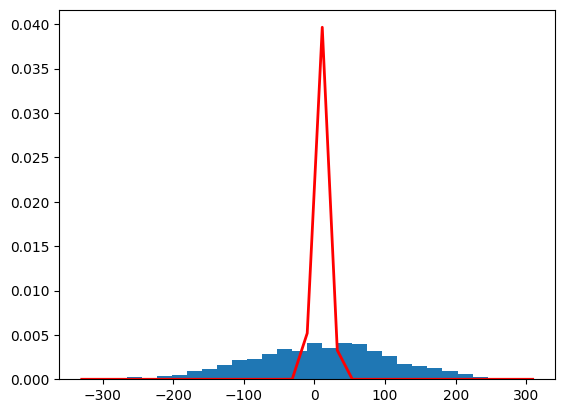

In [18]:
count, bins, _ = plt.hist(sample1, 30, density=True)
plt.plot(bins, 1/(10 * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - 10)**2 / (2 * 10**2) ),
         linewidth=2, color='r')
plt.show()

In [19]:
print(f"Max: {sample1.max()} || Min: {sample1.min()} || Mean: {sample1.mean()}")

Max: 308.99223712983985 || Min: -329.38141194009876 || Mean: 10.864223166148191


In [109]:
# 10 
# one-armed bandit = slot machine, taking your money while only having 1 arm

class TenArmedBandit: 
    def __init__(self, arms: int =10, reel_numbers:int =3): 
        """
        arms: number of levers 
        reel_numbers: number of slots on the machine
        """

        self.reel_numbers = 3
        self.symbols = np.array(["~", "!", "@", "#", "$", "%", "^", "&", "*", "S"])
        self.symbol_count = 10

        self.generate_arms(arms)

    def generate_arms(self, arms) -> None: 
        # store mean and std deviation pair for distribution of different arms
        self.mean_deviation_pairs = []

        for i in range(arms): 
            mean = np.random.randint(5, 15)
            deviation = np.random.random()

            self.mean_deviation_pairs.append((mean, deviation))
    
    def pull_lever(self, index: int) -> np.array: 
        if index < 0 or index >= self.symbol_count: 
            return None
        
        # get mean and deviation specific for each levers
        mean, deviation = self.mean_deviation_pairs[index]
        print(f"Mean: {mean} || Deviation: {deviation}")

        # convert random numbers to appropriate indices
        random_numbers = np.random.normal(loc=mean, scale=deviation, size=self.reel_numbers)
        random_indices = [int(np.floor(num % 10)) for num in random_numbers]

        return_symbols = self.symbols[random_indices]

        # unallocate memory for efficient computing
        del random_numbers
        del random_indices
        del mean
        del deviation

        return return_symbols
    
    def display_result(self, result: np.array) -> None: 
        machine_width = 2 * len(result) - 1

        # calculate display row
        display_row = "|"

        for i in range(len(result)): 
            if i == 0: 
                display_row += f" {result[i]}"
            else: 
                display_row += f" | {result[i]}"
         
        display_row += " |"

        print(f"| {'- ' * machine_width}|")
        print(f"| {'- ' * machine_width}|")
        print(display_row)
        print(f"| {'- ' * machine_width}|")
        print(f"| {'- ' * machine_width}|")

In [110]:
bandit = TenArmedBandit(arms=10, reel_numbers=3)

In [111]:
result = bandit.pull_lever(0)
bandit.display_result(result)

Mean: 8 || Deviation: 0.19045539495206776
| - - - - - |
| - - - - - |
| & | * | * |
| - - - - - |
| - - - - - |
